<a href="https://colab.research.google.com/github/ascxdd/Salesforecastingsystem_0077/blob/main/sales_forecasting_system_for_an_e_commerce_food_product.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

In [ ]:
!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [ ]:
!pip install MinMaxScalar

ERROR: Could not find a version that satisfies the requirement MinMaxScalar (from versions: none)
ERROR: No matching distribution found for MinMaxScalar


In [ ]:
import pandas as pd
import numpy as np
import math
from scipy import stats
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint



In [ ]:
# Read the dataset from a CSV file located at the specified path.
data =pd.read_csv("train.csv", na_values=["########"])
# Create a DataFrame named 'df' to store and work with the data.
df = pd.DataFrame(data)
df.index_col=0,
df


<ipython-input-5-03a4bf219b81>:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.index_col=0,


,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


In [ ]:
for idx, col in enumerate(df.columns, start=1):
 print(f"{idx}: {col}")


1: date
2: store
3: item
4: sales


In [ ]:
store_sales = pd.read_csv("train.csv")
store_sales.head(10)

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
5,2013-01-06,1,1,12
6,2013-01-07,1,1,10
7,2013-01-08,1,1,9
8,2013-01-09,1,1,12
9,2013-01-10,1,1,9


check for null values in the data set

In [ ]:
# checking for the null values in the original data set
df.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [ ]:
store_sales.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [ ]:
# Create a copy of the DataFrame 'df' and store it in 'df_copy'.
df_copy = df.copy()

# Remove duplicate rows in 'df_copy' while keeping the first occurrence of each duplicated row.
df_copy.drop_duplicates(keep='first', inplace=True)


In [ ]:
df.copy()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


In [ ]:
# finding the null values in the given copy
df.copy().isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [ ]:
# Create a new DataFrame 'df_omit' by removing rows with missing (NaN) values from 'df_copy.'
df_omit = df_copy.dropna(axis=0)
df_omit


,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


In [ ]:
#showing the count of null values
df_omit.isnull().sum()


date     0
store    0
item     0
sales    0
dtype: int64

In [ ]:
# Create dummy variables for categorical columns in the DataFrame 'df_omit' and store the result in 'df_omit'.
# The 'drop_first=True' parameter drops the first category level for each categorical column to avoid multicollinearity.
df_omit = pd.get_dummies(df_omit, drop_first=True)
df_omit


,store,item,sales,date_2013-01-02,date_2013-01-03,date_2013-01-04,date_2013-01-05,date_2013-01-06,date_2013-01-07,date_2013-01-08,...,date_2017-12-22,date_2017-12-23,date_2017-12-24,date_2017-12-25,date_2017-12-26,date_2017-12-27,date_2017-12-28,date_2017-12-29,date_2017-12-30,date_2017-12-31
0,1,1,13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,11,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,14,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,13,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,10,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912995,10,50,63,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
912996,10,50,59,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
912997,10,50,74,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
912998,10,50,62,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


drp store and item column

In [ ]:
store_sales = store_sales.drop(['store','item'],axis=1)

In [ ]:
store_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   sales   913000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 13.9+ MB


converting date from object to datetime datatype

In [ ]:
store_sales['date'] = pd.to_datetime(store_sales['date'])

In [ ]:
store_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 13.9 MB


converting date to month period , and then sum the number no. of item of each month

In [ ]:
store_sales['date'] = store_sales['date'].dt.to_period("M")
monthly_sales = store_sales.groupby('date').sum().reset_index()

converting result date column to timestamp datatype

In [ ]:
monthly_sales['date'] = monthly_sales['date'].dt.to_timestamp()

In [ ]:
monthly_sales.head(10)

,date,sales
0,2013-01-01,454904
1,2013-02-01,459417
2,2013-03-01,617382
3,2013-04-01,682274
4,2013-05-01,763242
5,2013-06-01,795597
6,2013-07-01,855922
7,2013-08-01,766761
8,2013-09-01,689907
9,2013-10-01,656587


Visualization

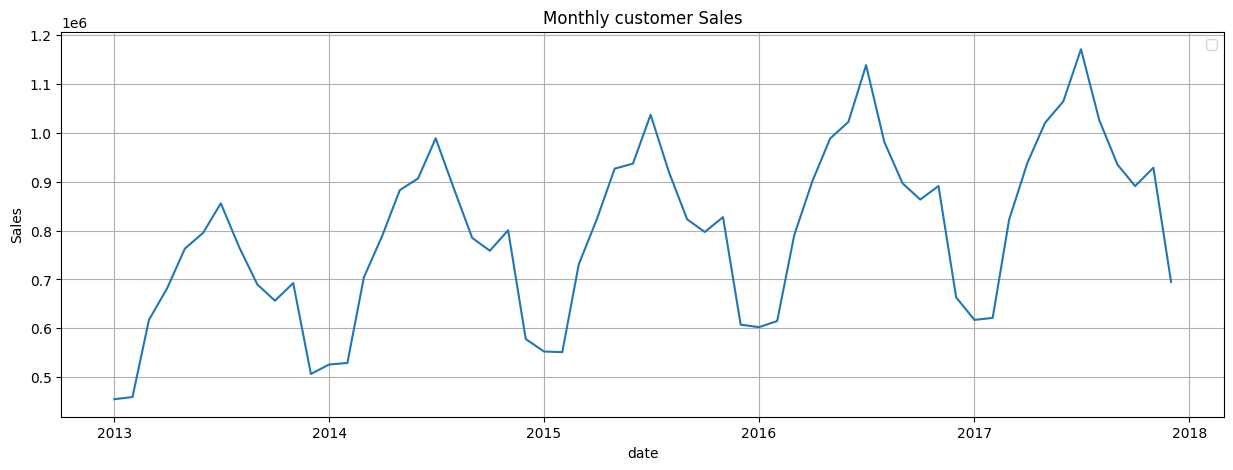

In [ ]:
# using scipy to show how data is actually fluctuating
plt.figure(figsize=(15,5))
plt.plot(monthly_sales['date'],monthly_sales['sales'])

# providing the labels
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Monthly Customers Sales")
plt.xlabel('date')
plt.ylabel('Sales')
plt.title('Monthly customer Sales')
plt.legend()
plt.grid()
plt.show()

call the difference on the sales columns to make the sales data stationary

In [ ]:
monthly_sales['sales_diff'] = monthly_sales['sales'].diff()
monthly_sales = monthly_sales.dropna()
monthly_sales.head(10)

,date,sales,sales_diff
2,2013-03-01,617382,157965.0
3,2013-04-01,682274,64892.0
4,2013-05-01,763242,80968.0
5,2013-06-01,795597,32355.0
6,2013-07-01,855922,60325.0
7,2013-08-01,766761,-89161.0
8,2013-09-01,689907,-76854.0
9,2013-10-01,656587,-33320.0
10,2013-11-01,692643,36056.0
11,2013-12-01,506607,-186036.0


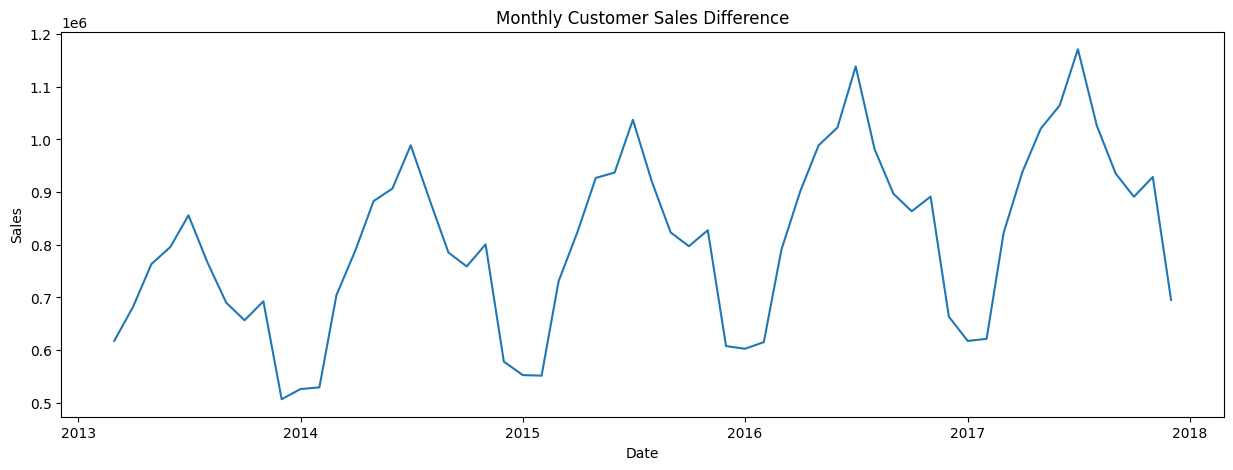

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(monthly_sales['date'], monthly_sales['sales'])
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Monthly Customer Sales Difference")
plt.show()


dropping of sales and date

In [ ]:
supervised_data = monthly_sales.drop(['date','sales'],axis=1)

preapring the supervised data

In [ ]:
for i in range(1,13):
  col_name = 'month_' + str(i)
  supervised_data[col_name] = supervised_data['sales_diff'].shift(i)
supervised_data = supervised_data.dropna().reset_index(drop=True)
supervised_data.head(10)

,sales_diff,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0,157965.0
1,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0
2,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0
3,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0
4,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0
5,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0
6,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0
7,-26241.0,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0
8,41900.0,-26241.0,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0
9,-222735.0,41900.0,-26241.0,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0


split the data into train and test

In [ ]:
train_data = supervised_data[:-12]
test_data = supervised_data[-12:]
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

Train data shape: (34, 13)
Test data shape: (12, 13)


In [ ]:
scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [ ]:
X_train, y_train = train_data[:,1:], train_data[:,0:1]
X_test, y_test = test_data[:,1:], test_data[:,0:1]
y_train = y_train.ravel()
y_test = y_test.ravel()
print("X_train shape :", X_train.shape)
print("y_train shape :", y_train.shape)
print("X_test shape :", X_test.shape)
print("y_test shape :", y_test.shape)

X_train shape : (34, 12)
y_train shape : (34,)
X_test shape : (12, 12)
y_test shape : (12,)


make prediction data frame to merge the predicted
sales prices of all trained algos

In [ ]:
sales_dates = monthly_sales['date'][-12:].reset_index(drop=True)
predict_df = pd.DataFrame(sales_dates)

In [ ]:

act_sales = monthly_sales['sales'][-13:].to_list()
print(act_sales)

[663411, 617306, 621369, 822667, 938862, 1020686, 1064624, 1171393, 1026403, 935263, 891160, 928837, 695170]


to create a linear regression model and predicted outputs

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pre = lr_model.predict(X_test)


In [ ]:
lr_pre = lr_pre.reshape(-1,1)
# this is a set matrix - contains the input features of test data and also the predicted output
lr_pre_test_set = np.concatenate([lr_pre, X_test], axis=1)
lr_pre_test_set = scaler.inverse_transform(lr_pre_test_set)

In [ ]:
result_list = []
for index in range(0, len(lr_pre_test_set)):
  result_list.append(lr_pre_test_set[index][0] + act_sales[index])
lr_pre_series = pd.Series(result_list, name="Linear Prediction")
predict_df = predict_df.merge(lr_pre_series, left_index = True, right_index = True)

In [ ]:

#print(predict_df)
lr_mse = np.sqrt(mean_squared_error(predict_df['Linear Prediction'], monthly_sales['sales'][-12:]))
lr_mae = mean_absolute_error(predict_df['Linear Prediction'], monthly_sales['sales'][-12:])
lr_r2 = r2_score = (predict_df['Linear Prediction'], monthly_sales['sales'][-12:])
print("Linear Regression MSE", lr_mse)
print("Linear Regression MAE", lr_mae)
print("Linear Regression R2", lr_r2)

Linear Regression MSE 16308.946774591575
Linear Regression MAE 12518.32186372774
Linear Regression R2 (0     6.478752e+05
1     6.296918e+05
2     8.197435e+05
3     9.433828e+05
4     1.033676e+06
5     1.065058e+06
6     1.201530e+06
7     1.001867e+06
8     9.412975e+05
9     9.081158e+05
10    9.163515e+05
11    6.948589e+05
Name: Linear Prediction, dtype: float64, 48     617306
49     621369
50     822667
51     938862
52    1020686
53    1064624
54    1171393
55    1026403
56     935263
57     891160
58     928837
59     695170
Name: sales, dtype: int64)


Visualization of the prediction against eh actual sales

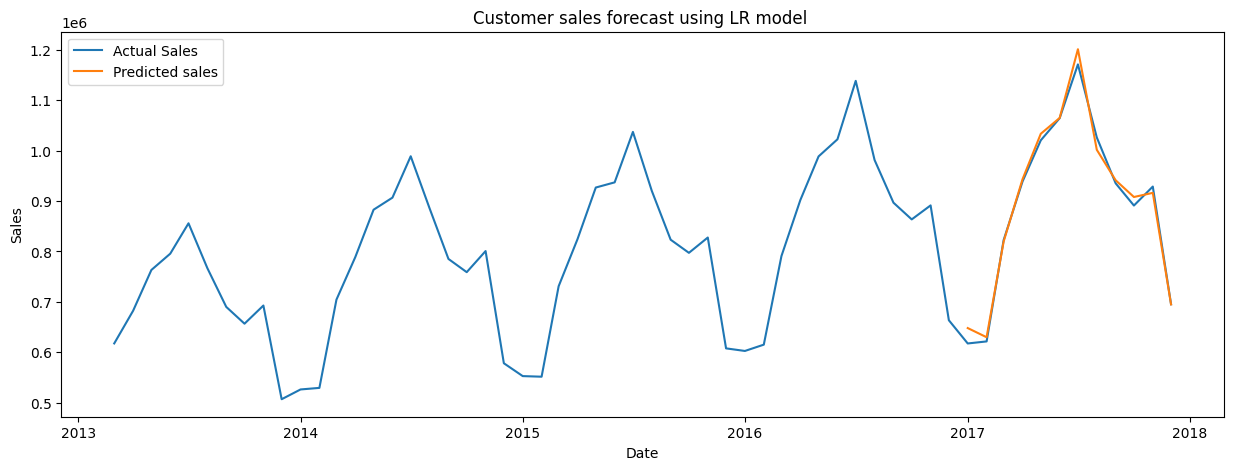

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(monthly_sales['date'], monthly_sales['sales'])
plt.plot(predict_df['date'], predict_df['Linear Prediction'])
plt.title("Customer sales forecast using LR model ")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(['Actual Sales', 'Predicted sales'])
plt.show()